<a href="https://colab.research.google.com/github/moraxella/Deep-learnig-with-pytorch/blob/main/Image_classification_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1REr0MPQcxPPTHBS4zdpDCloQXdYnII-N')

     |████████████████████████████████| 71kB 5.7MB/s 


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
jovian.commit(project='image-classification-project-2')

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/ankitsainiz865/image-classification-project-2


'https://jovian.ai/ankitsainiz865/image-classification-project-2'

In [5]:
import os
import torch 
import torchvision
from torch.utils.data import random_split 
from torchvision.datasets import ImageFolder
from torchvision import transforms as tt
from torchvision.utils import make_grid
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
import cv2
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

### **Uploading the file**

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sorridere","key":"585bf108fd4cb25d77922d5874124d84"}'}

In [7]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/

#changing the permisssion
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:30<00:00, 39.9MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.4MB/s]


In [9]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [11]:
#path to chest xray folder 
data_dir = './chest_xray/chest_xray/'

print (os.listdir(data_dir)) #contain four classes

#Elements in the list 
print (os.listdir(data_dir + '/train'))

print ("-----------------------------------------------------------------------------------------------")

#counting
pneumonia_files = os.listdir(data_dir + '/train/PNEUMONIA')
normal_files = os.listdir(data_dir + '/train/NORMAL')

#counting pneumonia 
print ('Number of X-rays showing pneumonia infection are {}'.format(len(pneumonia_files)))
print (pneumonia_files[0:5])

print ("-----------------------------------------------------------------------------------------------")

print ('Number of X-rays showing normal condition are {}'.format(len(normal_files)))
print (normal_files[0:5])

['val', '.DS_Store', 'train', 'test']
['NORMAL', '.DS_Store', 'PNEUMONIA']
-----------------------------------------------------------------------------------------------
Number of X-rays showing pneumonia infection are 3876
['person1343_bacteria_3419.jpeg', 'person1071_bacteria_3005.jpeg', 'person419_virus_857.jpeg', 'person921_bacteria_2846.jpeg', 'person1471_virus_2549.jpeg']
-----------------------------------------------------------------------------------------------
Number of X-rays showing normal condition are 1342
['IM-0631-0001-0002.jpeg', 'NORMAL2-IM-1351-0001.jpeg', 'IM-0320-0001.jpeg', 'NORMAL2-IM-0811-0001.jpeg', 'IM-0497-0001.jpeg']


In [12]:
#Loading the data and converting the each image into same sizes
train_loader = ImageFolder(data_dir+'/train', transform = tt.Compose([tt.Resize(255),
                                                                      tt.CenterCrop(225),
                                                                      tt.RandomHorizontalFlip(),
                                                                      #tt.RandomRotation(10),
                                                                      tt.RandomGrayscale(),
                                                                      #tt.RandomAffine(translate=(0.05,0.05), degrees=0),
                                                                      tt.ToTensor()]))

Text(0.5, 1.0, 'NORMAL VS PNEUMONIA')

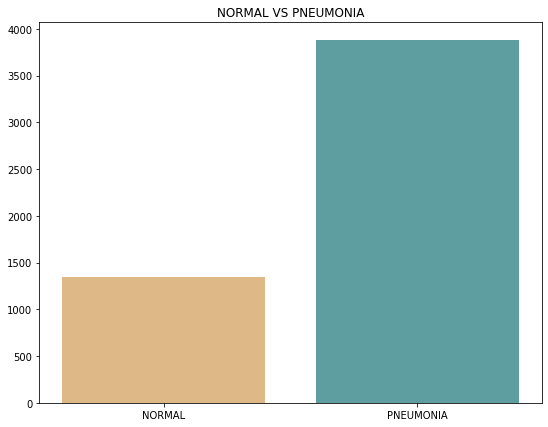

In [13]:
#reprensting the data 
plt.figure(figsize= (9, 7))
plt.bar(train_loader.classes, [len(normal_files), len(pneumonia_files)], color = ['#DEB887', '#5F9EA0'])
plt.title('NORMAL VS PNEUMONIA')

Shape: torch.Size([3, 225, 225]), Label: 0


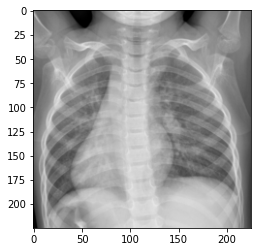

In [14]:
for img, label in train_loader:
  print ('Shape: {}, Label: {}'.format(img.shape, label))
  plt.imshow(img.permute(1, 2, 0))
  break

In [15]:
def plot_xrays(grp_images):
  fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,8))
  for i in range(len(grp_images)):
    image = cv2.cvtColor(cv2.imread(grp_images[i]), cv2.COLOR_BGR2RGB)
    ax[i//5][i%5].imshow(image)
    if i < 5:
      ax[i//5][i%5].set_title("PNEUMONIA")
    elif i >= 5:
      ax[i//5][i%5].set_title("NORMAL")

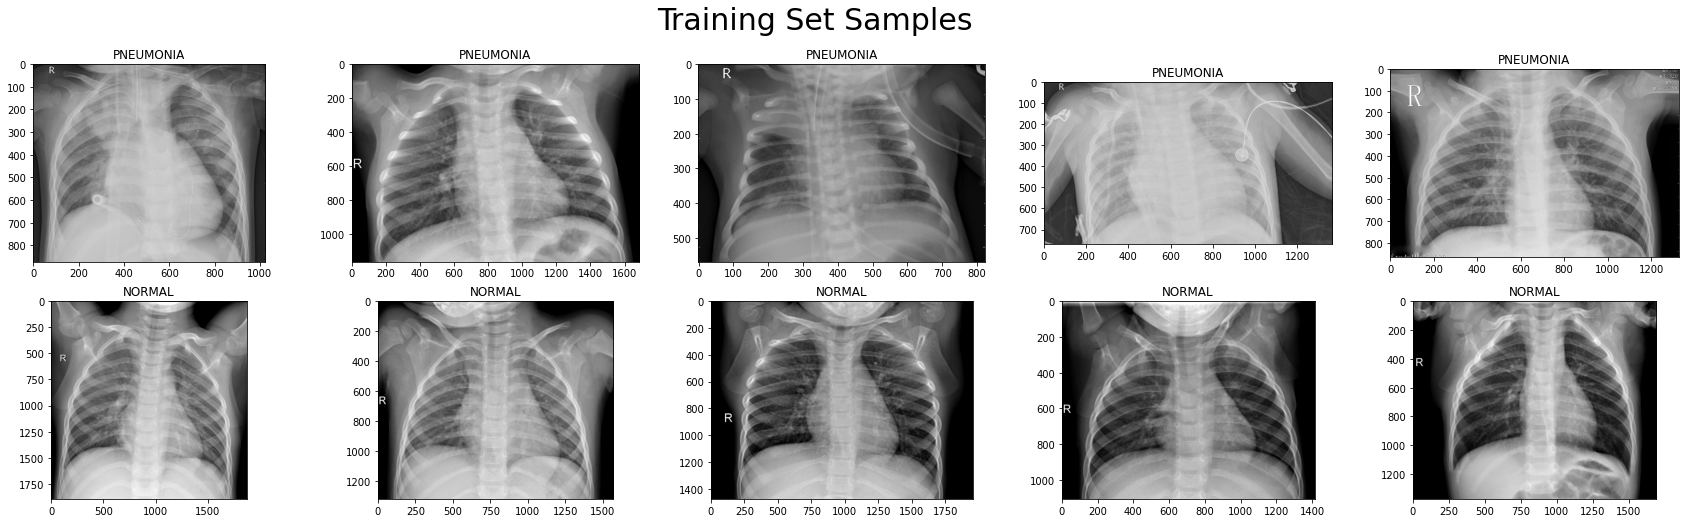

In [16]:
from random import sample

random_sample = sample([os.path.join(data_dir+'/train/PNEUMONIA', file) for file in os.listdir(data_dir + './train/PNEUMONIA')], 5) + \
                sample([os.path.join(data_dir+'/train/NORMAL', file) for file in os.listdir(data_dir + './train/NORMAL')], 5)

plot_xrays(random_sample)
plt.suptitle('Training Set Samples', fontsize=30)
plt.show()

In [17]:
#Assigning the random see so that we get the same sampling set everytime helps in imporving the model

random_seed = 42
torch.manual_seed(random_seed);

In [18]:
valid_size = round(len(train_loader)*30/100) #30% of the train loader
train_size = len(train_loader) - valid_size

train_ds, valid_ds = random_split(train_loader, [train_size, valid_size])
len(train_ds), len(valid_ds)

(3651, 1565)

In [19]:
batch_size = 16

train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=4, pin_memory=True)

len(train_dl), len(valid_dl) #no of batches

(229, 49)

In [20]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(19, 15))
    ax.axis('off')
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

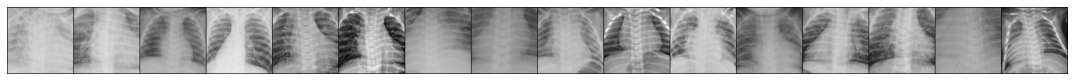

In [21]:
show_batch(train_dl)

### **Using a GPU**

In [22]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
        # Sending my data from the cpu memory to gpu memory 
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [23]:
device = get_default_device()
device

device(type='cuda')

In [24]:
valid_dl = DeviceDataLoader(valid_dl, device)
train_dl = DeviceDataLoader(train_dl, device)

Defining the model by extending the pneumonia_detection class which contains the required helper function for training & valiation set.



In [25]:
class pneumonia_detection(nn.Module):
  #predict prediction and find the cross entropy for - loss function 
  def training_step(self, batch):
    images, labels = batch 
    out = self(images) #calculating the prediction 
    loss = F.cross_entropy(out, labels) #calculating the loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels) #calculating the accuracy 
    return {'val_loss': loss.detach(), 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
  def epoch_end(self, epoch, result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
    epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Here we are using the **ResNet9** model which include around 9 convulational layer which include of two residual layer in between of the architecture to give the better performance. and for every convulational layer we have a batch normalization function which always normalize the output of every convulational layer, so that none of the channel can dominate others value.

In [26]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(pneumonia_detection):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64) #output --- 8 x 64 x 140 x 140
        self.conv2 = conv_block(64, 128, pool=True) #output --- 8 x 128 x 70 x 70
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) #output --- 8 x 128 x 70 x 70
        
        self.conv3 = conv_block(128, 256, pool=True) #output --- 8 x 256 x 35 x 35
        self.conv4 = conv_block(256, 512) #output --- 8 x 512 x 35 x 35
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(5),
                                        nn.MaxPool2d(7),
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, 2))
        
    def forward(self, xb):
        out = self.conv1(xb)
        #print (out.shape)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        #print (out.shape)
        return out

In [27]:
model = to_device(ResNet9(3, 2), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### **Taining the model**

Small changes to the fit function is done by including various important features regarding hyperparameters, gradient descent and weight etc. Here we are using **One Cycle Learning Rate Policy**, **Weight decay** and **Gradient clipping**.

In [28]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [29]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.2617434859275818, 'val_loss': 0.7055046558380127}]

In [30]:
epochs = 15
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [31]:
%%time
history = fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 0.3793, val_loss: 0.1780, val_acc: 0.9378
Epoch [1], train_loss: 0.2608, val_loss: 0.1976, val_acc: 0.9219
Epoch [2], train_loss: 0.2936, val_loss: 0.1329, val_acc: 0.9476
Epoch [3], train_loss: 0.2350, val_loss: 0.1524, val_acc: 0.9392
Epoch [4], train_loss: 0.2097, val_loss: 0.1727, val_acc: 0.9346
Epoch [5], train_loss: 0.1853, val_loss: 0.1647, val_acc: 0.9358
Epoch [6], train_loss: 0.1777, val_loss: 0.1586, val_acc: 0.9333
Epoch [7], train_loss: 0.1651, val_loss: 0.1359, val_acc: 0.9520
Epoch [8], train_loss: 0.1488, val_loss: 0.1128, val_acc: 0.9564
Epoch [9], train_loss: 0.1346, val_loss: 0.1175, val_acc: 0.9603
Epoch [10], train_loss: 0.1187, val_loss: 0.1212, val_acc: 0.9532
Epoch [11], train_loss: 0.1054, val_loss: 0.1008, val_acc: 0.9635
Epoch [12], train_loss: 0.0964, val_loss: 0.1067, val_acc: 0.9596
Epoch [13], train_loss: 0.0785, val_loss: 0.1024, val_acc: 0.9559
Epoch [14], train_loss: 0.0722, val_loss: 0.0988, val_acc: 0.9616
CPU times: user 12mi

In [32]:
jovian.log_metrics(Validation_loss = history[-1]['val_loss'],
                   Validation_accuracy = history[-1]['val_acc'],
                   Training_loss = history[-1]['train_loss'])

[jovian] Metrics logged.


In [33]:
torch.save(model.state_dict(), 'pneumonia_xrays_classification_logs.pth')

In [34]:
jovian.commit(project= 'image-classification-project-2', 
              environment=None, 
              outputs=['pneumonia_xrays_classification_logs.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ankitsainiz865/image-classification-project-2


'https://jovian.ai/ankitsainiz865/image-classification-project-2'

In [35]:
def plot_accuracies(history):
  acc = [x['val_acc'] for x in history ]
  plt.plot(acc, '-x')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs epoch')

In [36]:
def plot_loss(history):
  val_losses = [x['val_loss'] for x in history]
  train_losses = [x.get('train_loss', 0.4369) for x in history]
  plt.plot(val_losses, '-rx')
  plt.plot(train_losses, '-bx')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Validation Loss', 'Training Loss'])
  plt.title('Losses vs epoch')

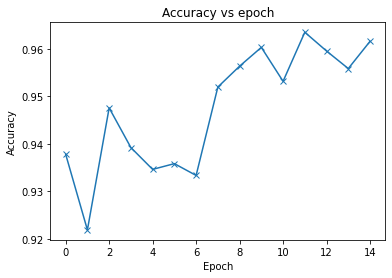

In [37]:
plot_accuracies(history)

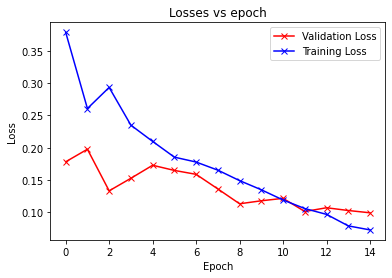

In [38]:
plot_loss(history)

Visualizing how the learning rate changed over time, batch-by-batch over all the epochs.

In [39]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

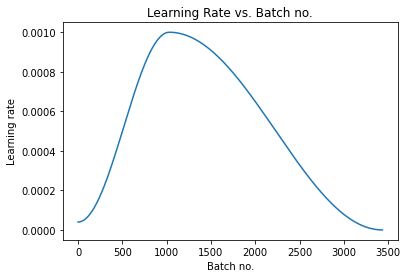

In [40]:
plot_lrs(history) #One Cycle Learning Rate Policy

### **Testing with individual images**

In [41]:
test_loader = ImageFolder(data_dir + '/test', transform = tt.Compose([tt.Resize(255),
                                                                      tt.CenterCrop(225),
                                                                      tt.RandomHorizontalFlip(),
                                                                      #tt.RandomRotation(10),
                                                                      #tt.RandomGrayscale(),
                                                                      #tt.RandomAffine(translate=(0.05,0.05), degrees=0),
                                                                      tt.ToTensor()]))

In [42]:
test_dl = DataLoader(test_loader, batch_size, num_workers = 4, pin_memory = True)

In [44]:
print ('The number of images present in the test dataset is : {}'.format(len(test_loader)))

print ("-------------------------------------------------------------------------------------------------")
print (test_loader.classes)

The number of images present in the test dataset is : 624
-------------------------------------------------------------------------------------------------
['NORMAL', 'PNEUMONIA']


In [46]:
test_dl = DeviceDataLoader(test_dl, device)

In [47]:
evaluate(model, test_dl)

{'val_acc': 0.8044871687889099, 'val_loss': 0.6460902690887451}

In [48]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_loader.classes[preds[0].item()]

Original: NORMAL, Prediction: PNEUMONIA


(<matplotlib.image.AxesImage at 0x7f7cdb04ecc0>,)

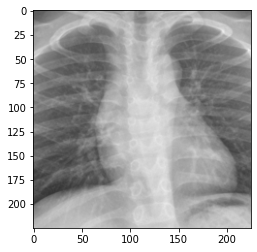

In [49]:
img, label = test_loader[3]
print ('Original: {}, Prediction: {}'.format(test_loader.classes[label], predict_image(img, model)))
plt.imshow(img.permute(1, 2, 0)),

Original: PNEUMONIA, Prediction: PNEUMONIA


(<matplotlib.image.AxesImage at 0x7f7cdb1df278>,)

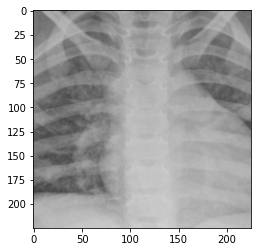

In [50]:
img, label = test_loader[500]
print ('Original: {}, Prediction: {}'.format(test_loader.classes[label], predict_image(img, model)))
plt.imshow(img.permute(1, 2, 0)),

Original: PNEUMONIA, Prediction: PNEUMONIA


(<matplotlib.image.AxesImage at 0x7f7cdb0a31d0>,)

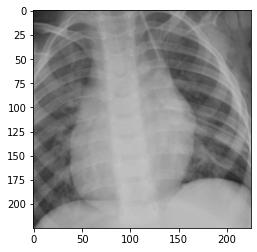

In [51]:
img, label = test_loader[378]
print ('Original: {}, Prediction: {}'.format(test_loader.classes[label], predict_image(img, model)))
plt.imshow(img.permute(1, 2, 0)),

Original: PNEUMONIA, Prediction: PNEUMONIA


(<matplotlib.image.AxesImage at 0x7f7cdbc08ef0>,)

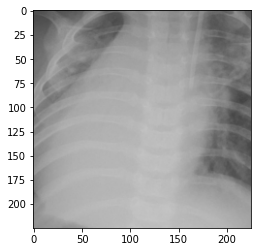

In [52]:
img, label = test_loader[400]
print ('Original: {}, Prediction: {}'.format(test_loader.classes[label], predict_image(img, model)))
plt.imshow(img.permute(1, 2, 0)),

Original: NORMAL, Prediction: NORMAL


(<matplotlib.image.AxesImage at 0x7f7cdbbe7eb8>,)

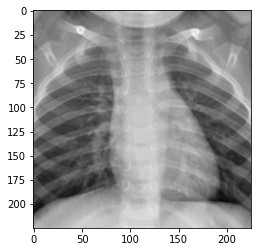

In [53]:
img, label = test_loader[150]
print ('Original: {}, Prediction: {}'.format(test_loader.classes[label], predict_image(img, model)))
plt.imshow(img.permute(1, 2, 0)),

Here the accuracy that we got after running the complete model on test data set is around 80%, which is bad in comparsion to the validation set which gives around 96% of accuracy, but by considering the size of the of the data that we have it's is quite good. The reason of this lacking in accuracy then the validation is the amount of data that we had to train is not enough for model.
 

In [54]:
jovian.commit(project='image-classification-project-2')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/ankitsainiz865/image-classification-project-2


'https://jovian.ai/ankitsainiz865/image-classification-project-2'